# Title: Reinforcement Learning with Human Feedback (RLHF): Bridging the Gap between AI and Human Expertise

#### Members' Names: Roshan Issac & Amarpreet Kaur

####  Emails: roshan.issac@torontomu.ca ,amarpreet.kaur@torontomu.ca 

# Introduction:

#### Problem Description:

Current text summarization models often fail to produce high-quality summaries that align with human quality standards. This misalignment is due to the traditional supervised learning objectives, which focus on maximizing the likelihood of human-written texts without distinguishing between critical and non-critical errors. As a result, these models can generate summaries that are technically correct but do not meet human preferences for quality and relevance. The challenge is to develop a summarization approach that better captures and incorporates human judgments to produce summaries that are both accurate and aligned with human evaluative standards.

#### Context of the Problem:

The context of the problem addressed in the project centers on the inadequacy of traditional supervised learning methods and metrics like ROUGE in producing high-quality text summarizations that align with human standards. As language models have advanced, these conventional training metrics have struggled to capture the nuances of human judgment, often prioritizing technical correctness over relevance and readability from a human perspective. The project  highlights the need for integrating human feedback directly into the training process to better align model outputs with actual human preferences, addressing the gap between model capabilities and the subjective quality expectations of users.

#### Limitation About other Approaches:

Traditional text summarization approaches, particularly those using supervised learning and metrics like ROUGE, face several key limitations:

- **Inadequate Metrics**: ROUGE prioritizes surface-level similarity, missing deeper semantic qualities.
- **Error Sensitivity**: Supervised learning fails to differentiate between critical and minor errors, producing technically correct but often unsatisfactory summaries.
- **Generalization Challenges**: These models struggle to adapt across various content types and domains.
- **Lack of Human Element**: There's no direct human feedback integration, hindering alignment with evolving human preferences.

#### Solution:

We are experimeting a simplified setup of RLHF algorithm using the Google provided Vertex AI RLHF pipeline template
which has the following key components,

-**Collect Human Feedback**: Compile a dataset from human evaluations comparing different summaries.

-**Train a Reward Model**: Develop a model that uses this feedback to predict preferred summaries, aligning closer with human judgments.

-**Implement Reinforcement Learning**: Use the reward model to guide reinforcement learning, specifically using the Proximal Policy Optimization (PPO) algorithm, improving summaries based on human preferences. 

-**Iterative Refinement**: Continuously update the model with new feedback, refining the approach and ensuring alignment with human quality standards.

# Background

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| W. Zhou et al. [1] |  The paper proposes a method to evaluate natural language generation models by learning to compare generated text pairs using fine-tuned BERT|  Two datasets: the WritingPrompts dataset for story generation and the Dailydialog dataset for open-domain dialogue response generation | Inaccurately evaluate similar-quality texts and inherit BERT's biases
| D. M. Ziegler et al. [2] |  The method used is reinforcement learning combined with reward models trained from human feedback |  Uses the CNN/Daily Mail and TL;DR datasets for summarization tasks, and the BookCorpus dataset for stylistic continuation tasks| Limited by data quality issues and models' excessive reliance on copying input text.
| Nisan et al. [3] |  The method involves training a policy with the PPO algorithm via reinforcement learning to optimize summaries based on human preferences, using a reward model trained on human judgments| The TL;DR (Too Long; Didn't Read) dataset from Reddit, containing about 3 million posts across a variety of topics| The high costs and computational resources required for training models using human feedback.


# Methodology

Provide details of the method that you are implementing in the next section with figure(s).  Your methodology will be just one method discussed in one of the paper of your choice; it can be a merger or a simplified version of the papers. To avoid any confusion, do not present multiple methods, just one unified method as you will implement in the next section.


The methodology used in the project to improve text summarization through human feedback involves a detailed, iterative process that integrates human judgments directly into the training of language models. Here's a breakdown of the methodology:

The methodology used in the project is run the RLHF algorithm with a dataset which will help us to understand how the human feedback will improve the LLM response. In the paper,the authors used full dataset and presented their results,however due to the budget  and infrastructure limitations we are experimenting it will a subset of the data.Below are the few steps we followed,

1. **Data Collection**:
   * Collect Human Feedback: Gather a  preference dataset of human comparisons between pairs of summaries. For each pair, human evaluators choose the summary they prefer, capturing nuanced quality judgments.
   * Collect Prompt and test Data: Gather a prompt dataset consist reddit posts for the Reinforment Learning Loop and test data to make predictions from the tuned model.

2. **Model Training**:

   * Train a Reward Model
   
   Execute Vertex AI RLHF pipeline that contains the RLHF algorithm. To the pipeline we are giving the required data as input. The pipeline contains 3 main parts,

   * Reward Model Training

   In reward model training it uses the preference data and effectively learns to score summaries according to human quality assessments.

   * Reinforment Training Loop

   This component will implement reinforcement learning (specifically using the Proximal Policy Optimization, or PPO, algorithm) to train summarization policies. The reward model's output serves as the reward signal, guiding the policy to generate summaries that align with human preferences.It will continuously collect more human feedback on the summaries generated by the current policy. Use this new data to refine the reward model and adjust the summarization policy. This iterative loop helps the model adapt and improve over time, enhancing its ability to generate high-quality summaries as judged by humans.

   * Inference 
   
   This will use the tuned model on the validation/test dataset to give the predictions ie summarized outputs.


3. **Evaluation and Adaptation**:

   Here we will use the logs generated from reward and RL loop components to understand the performance of the model.From the logs we will examine the training curves such as reward loss,KL loss etc.

   Although ROUGE is not a good metric for our use case,we implemented it to understand its working.


# Implementation

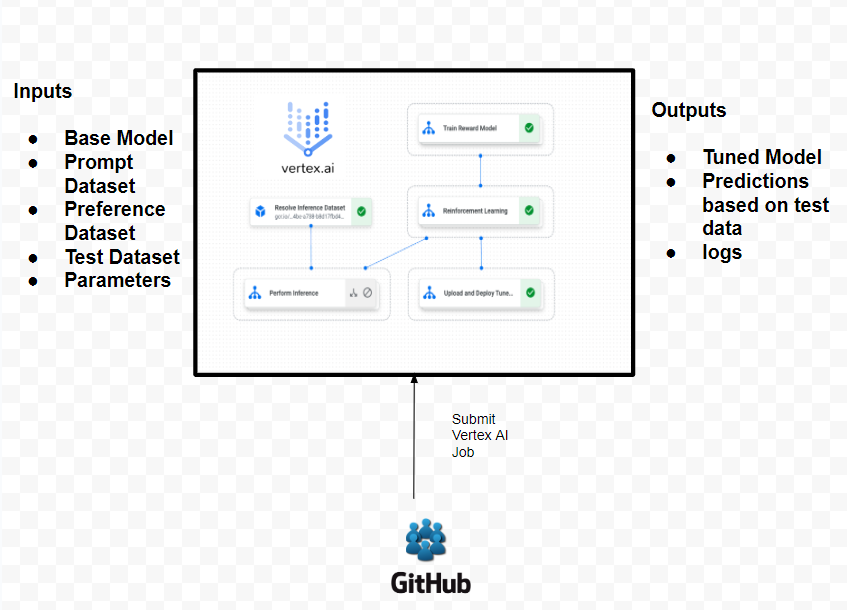

### Setup and Infrastructure

We leveraged [Vertex AI pipeline template](https://cloud.google.com/blog/products/ai-machine-learning/rlhf-on-google-cloud) provided by Google which contains RLHF algorithm.We used Cloud TPUs to execute the *small version* of the dataset because of the huge infrastructure and cost consideration and the details are given below,

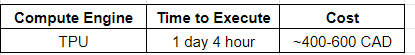

### LLM Model

Here we will be fine tuning base model Lllama-2 7b for summarization task.

### Datasets

Getting datasets for RLHF fine tuning is very difficult task as in the web only few of them are available in the right format.Moreover these datasets should get annotated by humans and different people will have different preferences. Here in this implementation we are using reddit posts which are already preprocessed by Google.

"Reinforcement Learning from Human Feedback" (RLHF) requires the following datasets:

 1. **Preference dataset**

This dataset is used to fine tune reward model,it has 4 keys. 

* Input prompt
* candidate response 0
* candidate response 1
* choice (candidate 0 or 1)

_Input prompt_ ,It is the text(reddit post) that needs to be summarized

_candidate response 0, candidate response 1_ are the two summarized responses for the Input Prompt.

_choice (candidate 0 or 1)_ consist of 0 or 1,It indicates whether the human labeler picks the candidate response 0 or 1

2. **Prompt dataset**

Once the reward mode has been trained we are using in the Reinforcement Learning(RL) Loop to tune the base LLM it requires a base dataset consisting of sample prompts.

It has _Input prompt_ key only, with  no response.

For the RLHF to work effectively we have to make sure that the prompts in the both dataset comes from the same distribution. The original raw source of the data used for this experiment comes from Reddit Posts from the below links,

* [Train Dataset](https://openaipublic.blob.core.windows.net/summarize-from-feedback/datasets/tldr_3_filtered/train.jsonl)
* [Validation Dataset](https://openaipublic.blob.core.windows.net/summarize-from-feedback/datasets/tldr_3_filtered/valid.jsonl)
* [Test Dataset](https://openaipublic.blob.core.windows.net/summarize-from-feedback/datasets/tldr_3_filtered/test.jsonl)
* [Samples](https://openaipublic.blob.core.windows.net/summarize-from-feedback/datasets/tldr_3_filtered/samples.txt)

We have used curated/preprocessed version of this data provided by Google and is stored in the below Cloud Storage Locations.

**Small Version Location**

1. **Preference dataset**: gs://vertex-ai/generative-ai/rlhf/text_small/summarize_from_feedback_tfds/comparisons/train/*.jsonl

2. **Prompt dataset**: gs://vertex-ai/generative-ai/rlhf/text_small/reddit_tfds/train/*.jsonl

3. **Test/Validation dataset**: gs://vertex-ai/generative-ai/rlhf/text_small/reddit_tfds/val/*.jsonl

We have filtered around 14 prompts from this validation dataset as test data for the inference for this experiment.These prompts are carefully selected to avoid any abusive,obscene,hate content which are very common in reddit posts.

These datasets are downloaded and stored under *datasets/* folder.

**Full Version Location**

1. **Preference dataset**: gs://vertex-ai/generative-ai/rlhf/text/summarize_from_feedback_tfds/comparisons/train/*.jsonl

2. **Prompt dataset**: gs://vertex-ai/generative-ai/rlhf/text/reddit_tfds/train/*.jsonl

3. **Test/Validation dataset**: gs://vertex-ai/generative-ai/rlhf/text/reddit_tfds/val/*.jsonl


### Installing the prerequisites and Google Cloud Setup

In [62]:
import google.cloud.aiplatform as aiplatform
from google_cloud_pipeline_components.preview.llm import rlhf_pipeline

In [88]:
# Install the required packages

!pip install -r requirements.txt --quiet

In [81]:
# Mention the Google Cloud Project Name you want to run this experiment,
#You can find more details here https://cloud.google.com/resource-manager/docs/creating-managing-projects
PROJECT_ID = "edplato-ds-dev"

In [5]:
# To authenticate with google cloud ,you need a Service Account key .You can keep that inside keys folder and provide the path as below.
# Follow this link to understand how to generate keys,https://cloud.google.com/iam/docs/keys-create-delete
# Here we are storing the keys inside the environment variable GOOGLE_APPLICATION_CREDENTIALS,https://googleapis.dev/python/google-auth/2.6.6/user-guide.html#application-default
# Since keys are confidential,It is not provided with this repo and is added to .gitignore.

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="D:\\TMU\\Winter_Term_2023\\NLP_Project\\nlp-project-rlhf\\keys\\gcp-key.json"

In [83]:
# The region should be set to below as the Google provided RLHF pipeline is available only this region.
REGION = "europe-west4"

### Creating a Cloud Storage Bucket and Uploading Dataset

We can create a Google Cloud Storage(GCS) bucket inside our project and upload the datasets to use in this project. We can also use the google provided URIs for the datasets directly.

In [7]:
#loading helper functions
from helpers.gcp_utils import create_bucket_class_location
from helpers.gcp_utils import upload_datasets_to_gcs

In [8]:
#Name of the bucket to be created,More details can be found here. https://cloud.google.com/storage/docs/creating-buckets
bucket_name=f"nlp-project-{PROJECT_ID}-ds8008"
BUCKET_URI=f"gs://{bucket_name}"

In [ ]:
#creating a google cloud storage bucket
create_bucket_class_location(bucket_name,REGION)

In [9]:
#mention the file locations to upload
file_locations=['datasets/preference_dataset.jsonl','datasets/prompt_dataset.jsonl','datasets/validate_dataset.jsonl']
#Uploading datasets to the GCS bucket created
upload_datasets_to_gcs(bucket_name,file_locations,source_directory="")

Uploaded datasets/preference_dataset.jsonl to nlp-project-edplato-ds-dev-ds8008.
Uploaded datasets/prompt_dataset.jsonl to nlp-project-edplato-ds-dev-ds8008.
Uploaded datasets/validate_dataset.jsonl to nlp-project-edplato-ds-dev-ds8008.


### Loading and Exploring Datasets

#### Preference dataset

In [63]:
import json

preference_dataset_path = 'datasets/preference_dataset.jsonl'
preference_data = []
with open(preference_dataset_path) as f:
    for line in f:
        preference_data.append(json.loads(line))

In [64]:
sample_1 = preference_data[0]
print(type(sample_1))

<class 'dict'>


In [68]:
print(f"Input Text:\n{sample_1.get('input_text')}\n")

Input Text:
I had been in a long distance relationship with a man in Australia (I am in the US) for about a month. The relationship didn't last long because it became toxic extremely quick. Constant fighting, mental abuse from both ends, and it was all around just a terrible experience. It was turning both of us into bad people and I wanted out of it, which I made abundantly clear to him. 

During our relationship we both said nasty, inhumane things to each other. In the heat of the argument I had told him to just go off himself, this has happened a couple times. I know it's extremely wrong to say stuff like that, but that's how toxic the relationship was. This brings the story to him threatening me with legal action.

Him and his family have been stalking my family, trying to find out my parents contact information and social media profiles to contact them about how bad of a person their daughter is. He has been contacting my friends, harassing them about our relationship. Both him an

In [65]:
# Total count
print(len(preference_data))

929


In [66]:
print(f"candidate_0:\n{sample_1.get('candidate_0')}\n")
print(f"candidate_1:\n{sample_1.get('candidate_1')}\n")

candidate_0:
 Ex is threatening me with legal action because I've emotionally abused him. I'm dumbfounded and I'm not sure how to make this situation better.

candidate_1:
 Ex-boyfriend is threatening me with legal action because I was mean to him. I don't know what to do.



In [67]:
print(f"choice: {sample_1.get('choice')}")

choice: 0


#### Prompt dataset

In [69]:
prompt_dataset_path = 'datasets/prompt_dataset.jsonl'

In [70]:
prompt_data = []
with open(prompt_dataset_path) as f:
    for line in f:
        prompt_data.append(json.loads(line))
        
# Check how many prompts there are in this dataset
len(prompt_data)

38483

In [71]:
# Function to print the information in the prompt dataset with a better visualization
def print_d(d):
    for key, val in d.items():        
        print(f"key:{key}\nval:{val}\n")

In [72]:
print_d(prompt_data[0])

key:input_text
val:You can't think like that. 
 I  think  that the number of displayed Gs are the Gs the pilot is suffering. If the maneuver is not entirely level it means assymetric G-force load on the wings, so that in a turn a 8G load may snap your outer wing since it is under much stronger forces, while in a perfectly level maneuver the plane might manage 12 Gs and still stay in one piece. 
 The only "dive speed" limit that exists at all and that is measurable is the flutter speed, at which point the wings will self-oscillate until they break. This is a completely different thing than "safe pull-out speed", and what is "hard" to you either way? 
 10 degrees angle of attack? 15? Pulling the stick back as hard as you can and praying to the Arcade Battle gods that their silly flight models apply to HB too? [summary]: 



In [85]:
# Try with another prompt from the list 
print_d(prompt_data[3])

key:input_text
val:We have had our relationship for two and a half years and she is one of the sweetest and nicest people I know but I just don't feel happy around her anymore. We're both going to college and see each other on the weekends (about an hour train ride) but our relationship doesn't feel the same as it used to. She hasn't done anything wrong and I dont know how to make her feel like she hasn't done anything wrong when I break up with her because she will think it's her fault. Is it even okay to break up with someone just because you're not happy even though they try to make you happy? [summary]: 



### Compile the pipeline

In [74]:
# Import (RLFH is currently in preview),Here we are importing google provided RLHF pipeline template
from google_cloud_pipeline_components.preview.llm \
import rlhf_pipeline

In [75]:
# Import from KubeFlow pipelines
from kfp import compiler

In [76]:
# Define a path to store the compiled imported RLHF pipelie yaml file
RLHF_PIPELINE_PKG_PATH = "pipeline/rlhf_pipeline.yaml"

In [77]:
# Execute the compile function
compiler.Compiler().compile(
    pipeline_func=rlhf_pipeline,
    package_path=RLHF_PIPELINE_PKG_PATH
)

### Define the Vertex AI pipeline job

#### Calculate the number of reward model training steps

In [78]:
from helpers.gcp_utils import calculate_training_steps

reward_model_train_steps,_=calculate_training_steps(pref_dataset_size=len(preference_data),
                         prompt_dataset_size='',
                         reward_batch_size=64,
                         rl_batch_size='',
                         reward_no_of_epochs=30,
                         rl_no_of_epochs=''
                         )

print(reward_model_train_steps)

450


 #### Calculate the number of reinforcement learning training steps

 The **reinforcement_learning_train_steps** parameter is the number of reinforcement learning steps to perform when tuning the base model. 
- The number of training steps depends on the size of your prompt dataset. Usually, this model should train over the prompt dataset for roughly 10-20 epochs.
- Reward hacking: if given too many training steps, the policy model may figure out a way to exploit the reward and exhibit undesired behavior.

In [79]:
_,reinforcement_learning_train_steps=calculate_training_steps(pref_dataset_size='',
                         prompt_dataset_size=len(prompt_data),
                         reward_batch_size='',
                         rl_batch_size=64,
                         reward_no_of_epochs='',
                         rl_no_of_epochs=10
                         )
print(reinforcement_learning_train_steps)

6020


#### Submitting Vertex AI Pipeline Run

In [84]:

# Replace `None` with your tensorboard id (if you created one)
#This you can set if you wanted to view the results inside 
TENSORBOARD_ID = '5275738265045958656'

if TENSORBOARD_ID:
    # Note, the tensorboard instance must be in the same project and region as the tuning job.
    tensorboard_resource_id = (
        f"projects/{PROJECT_ID}/locations/{REGION}/tensorboards/{TENSORBOARD_ID}"
    )
else:
    tensorboard_resource_id = None

In [31]:
# Configure the parameters required. This includes path to prompt,preference and test dataset.
parameter_values_small={
        "preference_dataset": \
    "gs://nlp-project-edplato-ds-dev-ds8008/datasets/preference_dataset.jsonl",
        "prompt_dataset": \
    "gs://nlp-project-edplato-ds-dev-ds8008/datasets/prompt_dataset.jsonl",
        "eval_dataset": \
    "gs://nlp-project-edplato-ds-dev-ds8008/datasets/validate_dataset.jsonl",
        "large_model_reference": "llama-2-7b",
        "reward_model_train_steps": reward_model_train_steps,
        "reinforcement_learning_train_steps": reinforcement_learning_train_steps, # results from the calculations above
        "reward_model_learning_rate_multiplier": 1.0,
        "reinforcement_learning_rate_multiplier": 1.0,
        "kl_coeff": 0.1, # increased to reduce reward hacking
        "instruction":\
    "Summarize in less than 50 words",
     "accelerator_type": "TPU",
    "tensorboard_resource_id": tensorboard_resource_id,
    
    }
# Below is commented intentionally as we are not using full data this in this experiment.
# parameter_values_full={
#         "preference_dataset": \
#     "gs://vertex-ai/generative-ai/rlhf/text/summarize_from_feedback_tfds/comparisons/train/*.jsonl",
#         "prompt_dataset": \
#     "gs://vertex-ai/generative-ai/rlhf/text/reddit_tfds/train/*.jsonl",
#         "eval_dataset": \
#     "gs://vertex-ai/generative-ai/rlhf/text/reddit_tfds/val/*.jsonl",
#         "large_model_reference": "llama-2-7b",
#         "reward_model_train_steps": 10000,
#         "reinforcement_learning_train_steps": 10000, 
#         "reward_model_learning_rate_multiplier": 1.0,
#         "reinforcement_learning_rate_multiplier": 0.2,
#         "kl_coeff": 0.1,
#         "instruction":\
#     "Summarize in less than 50 words",
#     "accelerator_type": "TPU",
#     "tensorboard_resource_id": tensorboard_resource_id,
#     }



In [32]:
#Initialize the Vertex AI SDK to use in the given project and location
aiplatform.init(project=PROJECT_ID, location=REGION)

In [37]:
#Path of the bucket created
STAGING_BUCKET="gs://nlp-project-edplato-ds-dev-ds8008"

#Configure the pipeline job
job_small = aiplatform.PipelineJob(
    display_name="rlhf-tuning-nlp-project-small",
    job_id="rlhf-tuning-nlp-project-small",
    pipeline_root=STAGING_BUCKET,
    template_path=RLHF_PIPELINE_PKG_PATH,
    parameter_values=parameter_values_small)

# job_full = aiplatform.PipelineJob(
#     display_name="rlhf-tuning-nlp-project-full",
#     job_id="rlhf-tuning-nlp-project-full",
#     pipeline_root=STAGING_BUCKET,
#     template_path=RLHF_PIPELINE_PKG_PATH,
#     parameter_values=parameter_values_full)

#Submit the pipeline to Vertex AI to run
job_small.submit()


Creating PipelineJob
PipelineJob created. Resource name: projects/533204945883/locations/europe-west4/pipelineJobs/rlhf-tuning-nlp-project-small
To use this PipelineJob in another session:
pipeline_job = aiplatform.PipelineJob.get('projects/533204945883/locations/europe-west4/pipelineJobs/rlhf-tuning-nlp-project-small')
View Pipeline Job:
https://console.cloud.google.com/vertex-ai/locations/europe-west4/pipelines/runs/rlhf-tuning-nlp-project-small?project=533204945883


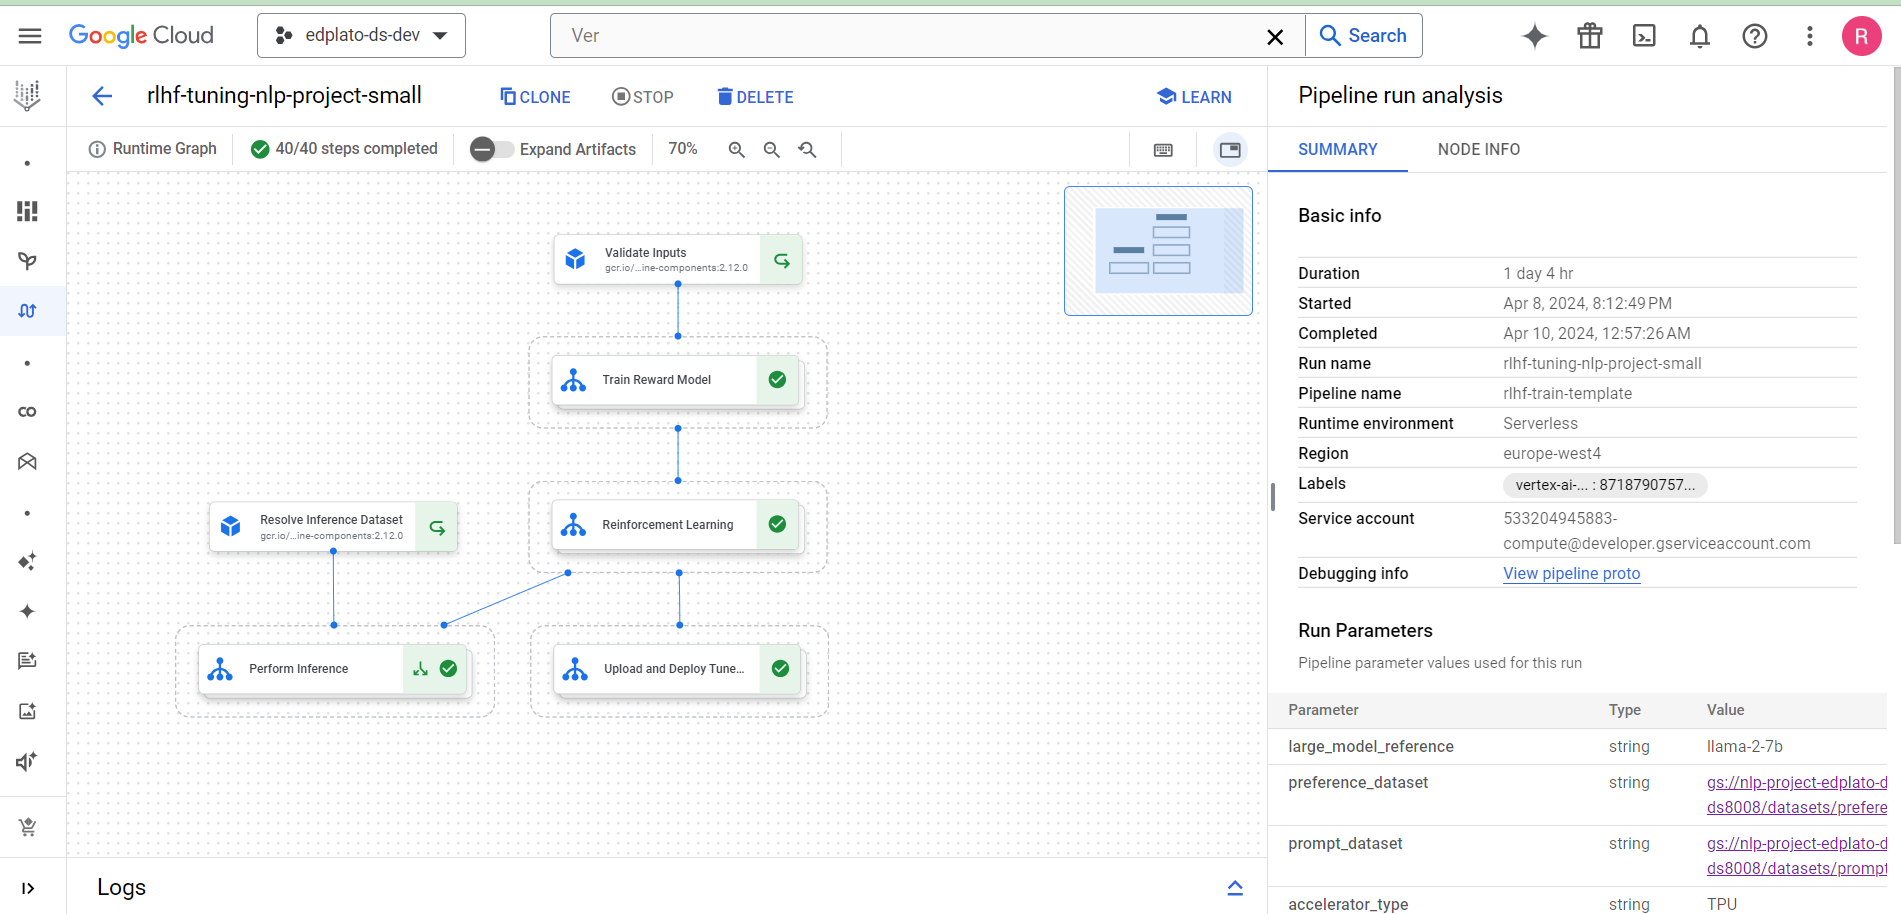

### Evaluate the Tuned Model

Training curves and Side by Side Evaluation are the two preferred metrics for RLHF Evaluation.

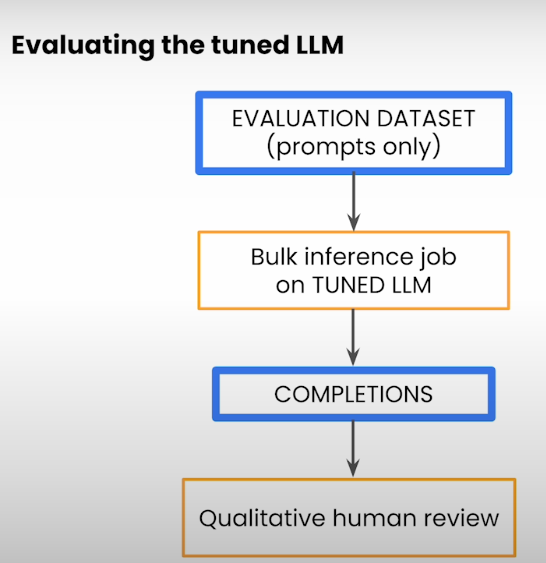


#### Downloading Tuned Model Predictions
The RLHF vertex AI pipeline has an Inference Component ,which will used the test/validate dataset to get the predictions from the tuned LLM.

1. **Downloading Predicted Summaries**

* Click on *"Perform Inference"* component to expand child components under it.
* Go to *"Bulk Inferrer"* component
* You will be able to see the *Output Parameters* on the right hand side and under *output_prediction_gcs_path* you will find the cloud storage location where the predictions  are stored.
* Go to this location and download the predictions and store it under *datasets/predictions.jsonl* folder

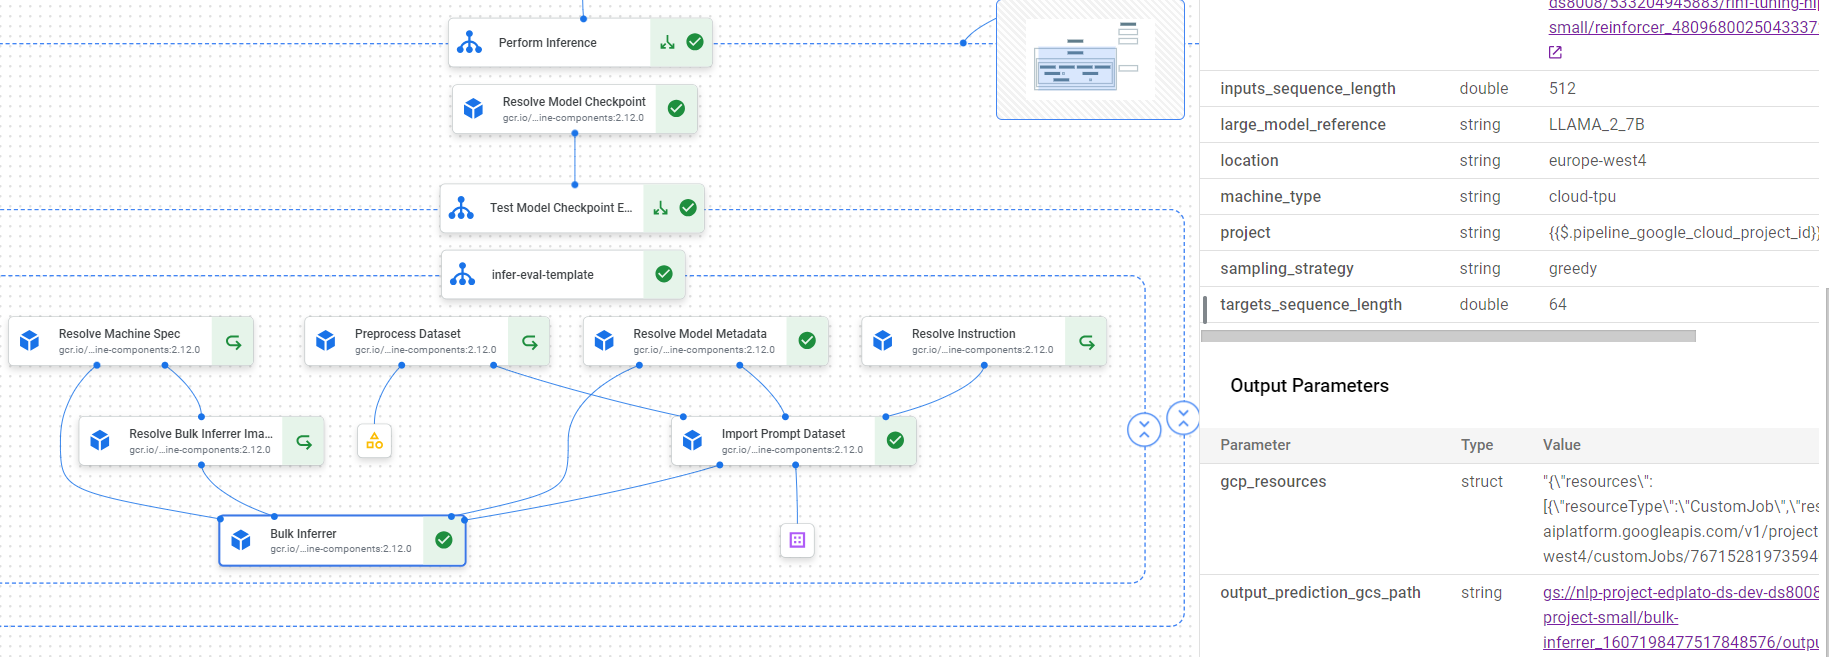

#### Getting Untuned Predictions from base Lllama-7b model

Google doesn't by default provides hosted Lllama-7b model,Instead it provides the model in its [Model Garden](https://cloud.google.com/model-garden?hl=en) but we need to deploy it to make inference which will incur cost.

We looked in the web to find hosted llama-7b model and found [Replicate](https://replicate.com/meta/llama-2-7b-chat) and used its play ground to generate base model(untuned) predictions for the prompts in the validation dataset to compare against the RLHF tuned model.

The untuned model predictions for the validation prompts are stored in *datasets/untuned_results.jsonl* folder.

#### Downloading Tensorboard logs for visualization
The logs of the Vertex AI pipeline run is logged as TensorBoard metrics and stored inside cloud storage.Follow the below steps to find out how to download these logs.

1. **Downloading Reward Logs**

* Click on *"Train Reward Model"* component to expand child components under it.
* Go to *"Reward Model Train"* component
* Click on *"the tensor_board"*  metrics artifact 
* You will be able to see the *Artifact Info* on the right hand side and under *URI* you will find the cloud storage location where the reward logs are stored.
* Go to this location and download the logs and store it under *reward_logs/* folder


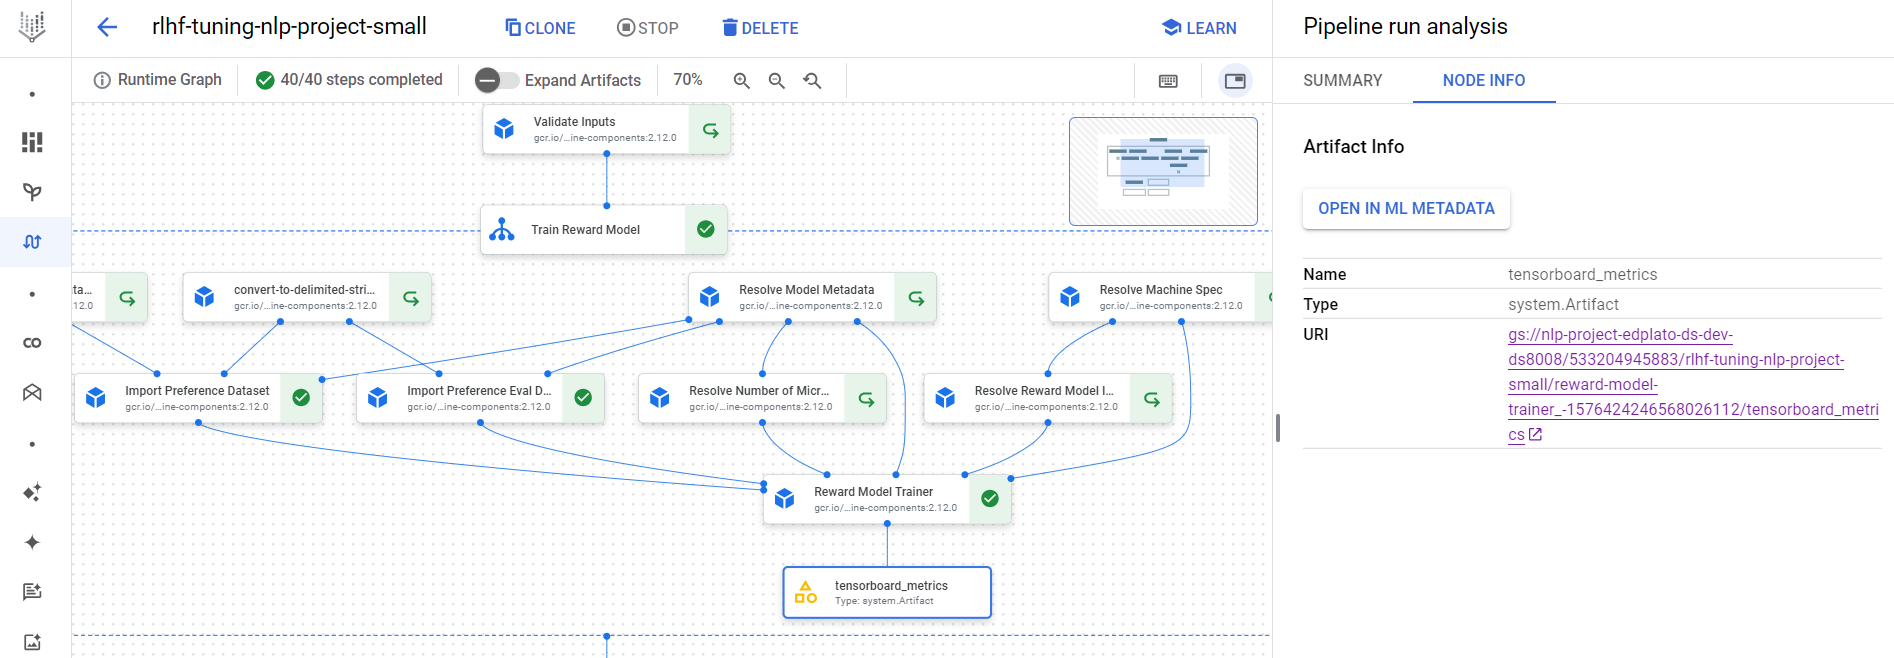

2. **Downloading Reinforment Learning Logs**

* Click on *"Reinforcement Learning"* component to expand child components under it.
* Go to *"Reinforcer"* component
* Click on *"the tensor_board"*  metrics artifact 
* You will be able to see the *Artifact Info* on the right hand side and under *URI* you will find the cloud storage location where the reward logs are stored.
* Go to this location and download the logs and store it under *reinforcer_logs/* folder

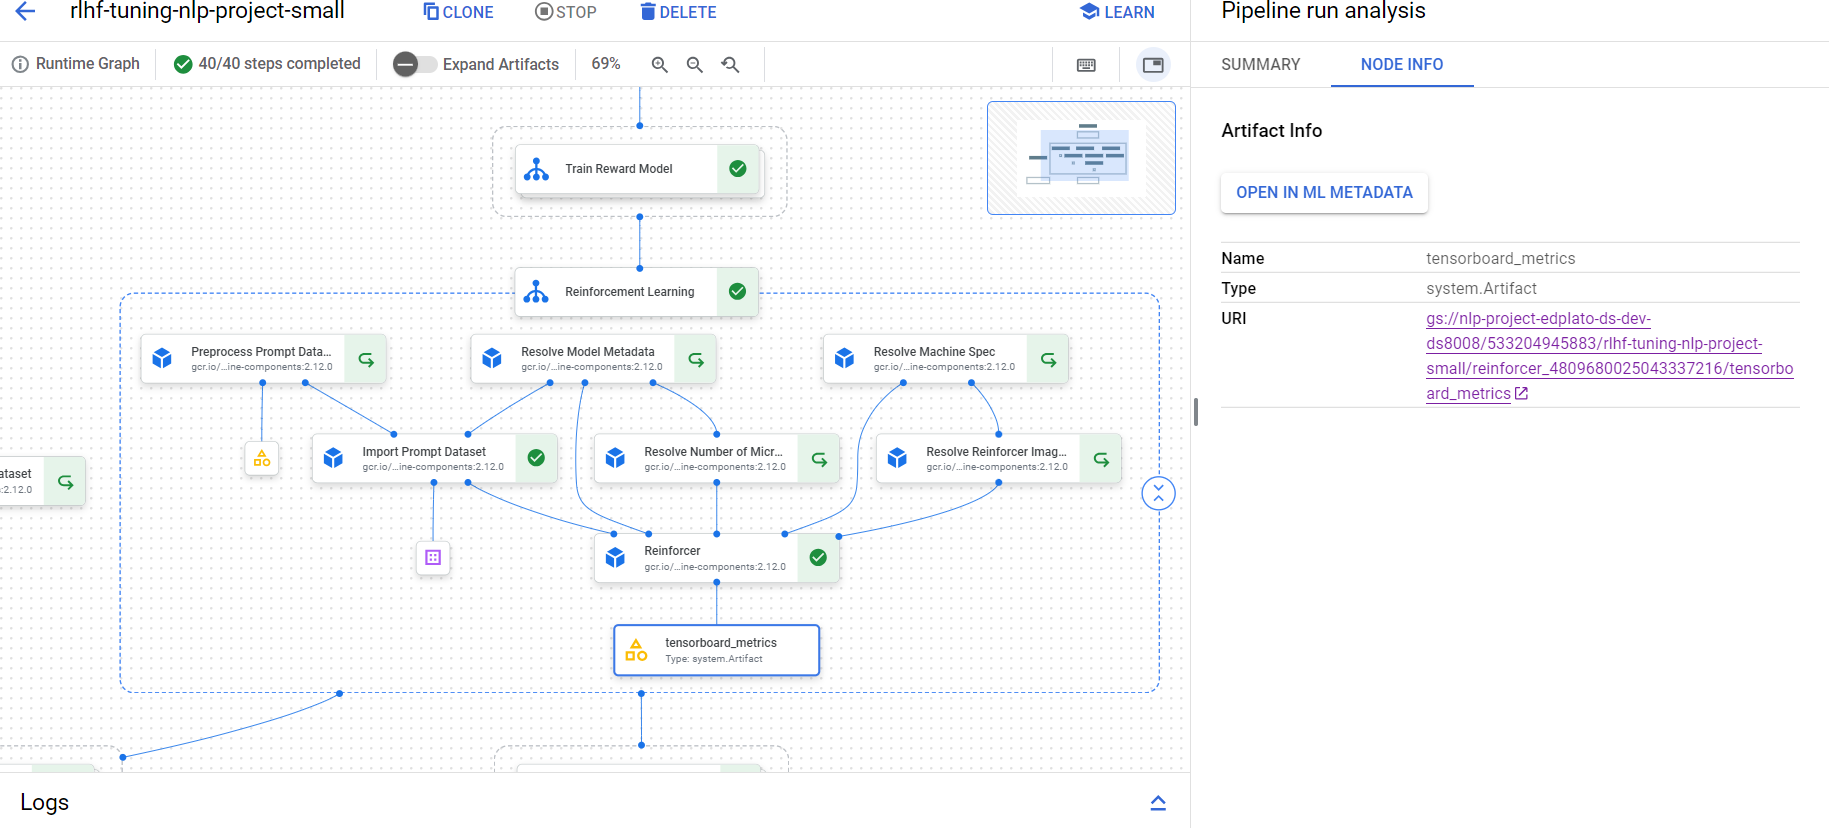

#### Explore results with Tensorboard

In [1]:
%load_ext tensorboard

In [3]:
# Loading reward logs by specifying the path to the log folder
%tensorboard --logdir reward_logs/

Reusing TensorBoard on port 6006 (pid 9224), started 0:01:28 ago. (Use '!kill 9224' to kill it.)

In [5]:
#Loading RL loop logs by specifying the path to the log folder
%tensorboard --logdir reinforcer_logs/

Reusing TensorBoard on port 6008 (pid 30684), started 0:00:10 ago. (Use '!kill 30684' to kill it.)

#### Training Curves



**Rank Loss(Reward Model)**

The loss should decrease overtime and should converge.The picture shows the rank loss for this experiment.Since it has used small dataset its not giving expected results.

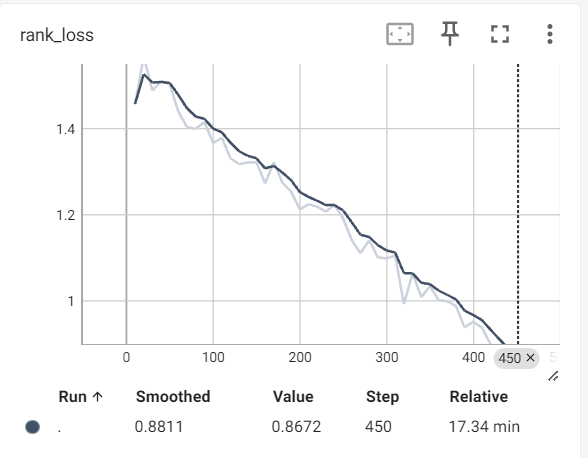

Training on full dataset will give the rank loss as below(Sourced from Google),

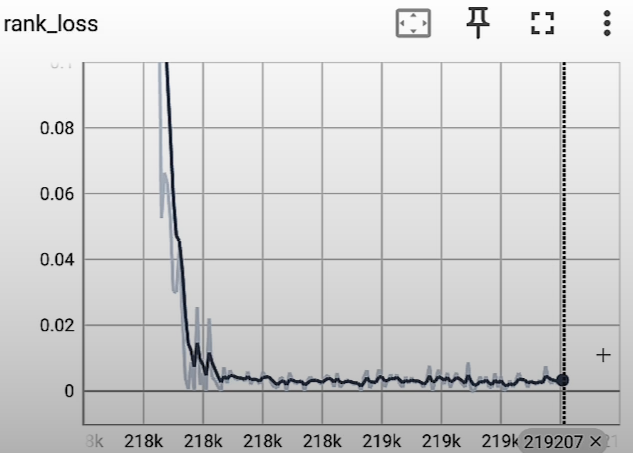


**KL Loss(Reinforcement Loop)**

KL loss tell us how much is the model deviating from the original base model,it should increase and plateau.In our case we can see it almost plateued.

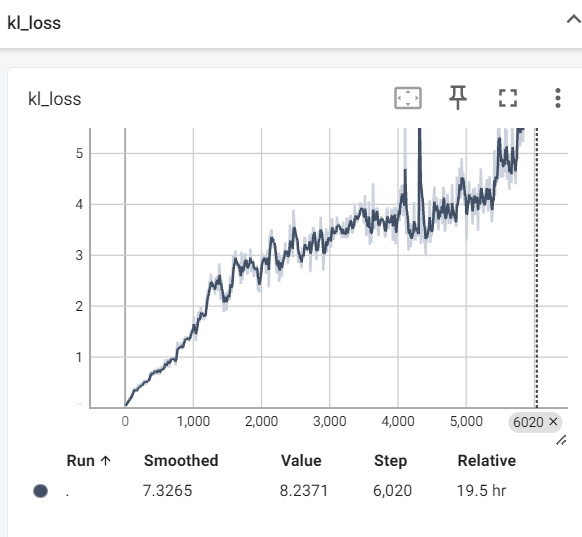

Training on full dataset will give the KL loss as below(Sourced from Google),

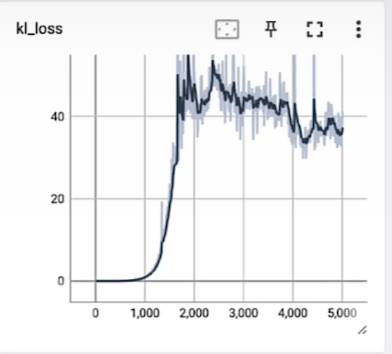




**Reward (Reinforcement Loop)**

it should increase and plateau.In our case we can see it almost plateued.

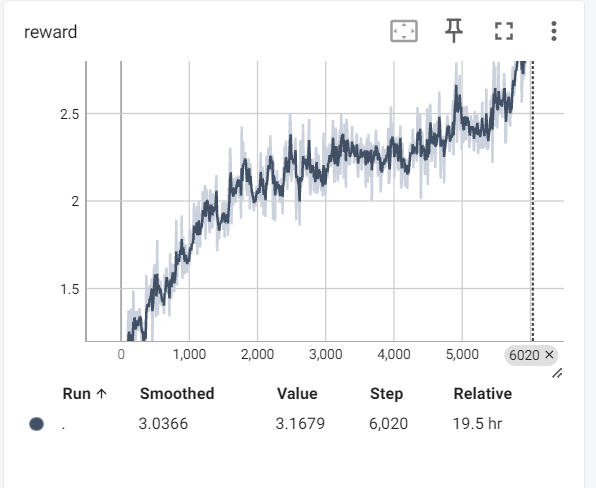

Training on full dataset will give the Reward as below(Sourced from Google),

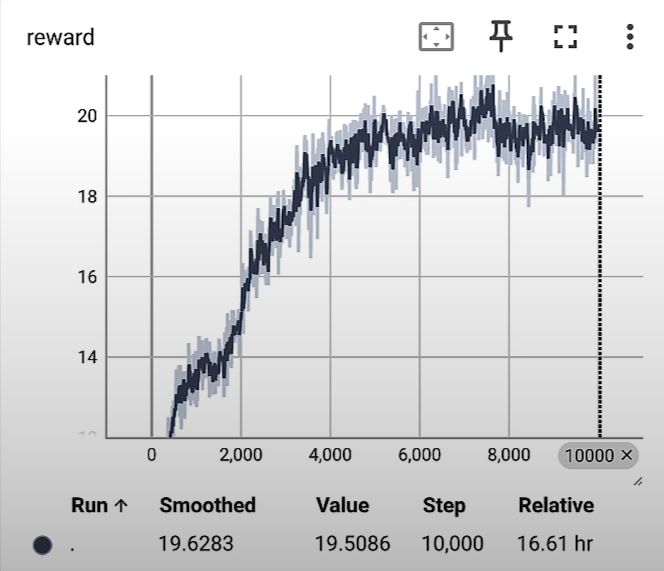

#### Side By Side Comparison

In [58]:
import json
predictions_path = 'datasets/predictions.jsonl'
predictions_tuned = []
with open(predictions_path) as f:
    for line in f:
        predictions_tuned.append(json.loads(line))

In [59]:
# Import for printing purposes
from helpers.gcp_utils import print_d,print_d_modified
# Look at the result produced by the tuned model
print_d(predictions_tuned[5])

key:inputs
val:{'inputs_pretokenized': "Summarize in less than 50 words\nFirst off, this may be more of a software issue than a hardware issue...so checking here first. \n So I lost my password to iTunes first AND forgot what email I used for my iTunes long long ago. I have a 120GB iPod. What used to be a tank before the re-release of the 160GB. \n After switching to Ubuntu a couple of years ago I hadn't used the iPod for anything but a memory bank where I can store .MP3s and .WAVs. \n One day I decided to get my iPod up and running with new music using Banshee. I figured might as well use this thing as an MP3 player. So I wiped everything on the iPod out and began putting music on it with Banshee. I put like 9GBs of music on it and it worked as if I had still been using iTunes. Everything seemed legit...for a couple weeks. \n I recently put some Single hits (e.g., percussion samples from drum machines) in MP3 format for sampling purposes  because I make beats and can re-sample them fr

In [44]:
eval_untuned_path = "datasets/untuned_results.jsonl"

In [45]:
eval_data_untuned = []

In [46]:
with open(eval_untuned_path) as f:
    for line in f:
        eval_data_untuned.append(json.loads(line))

In [48]:
# Look at the result produced by the untuned model
print_d(eval_data_untuned[5])

key:input_text
val:First off, this may be more of a software issue than a hardware issue...so checking here first. 
 So I lost my password to iTunes first AND forgot what email I used for my iTunes long long ago. I have a 120GB iPod. What used to be a tank before the re-release of the 160GB. 
 After switching to Ubuntu a couple of years ago I hadn't used the iPod for anything but a memory bank where I can store .MP3s and .WAVs. 
 One day I decided to get my iPod up and running with new music using Banshee. I figured might as well use this thing as an MP3 player. So I wiped everything on the iPod out and began putting music on it with Banshee. I put like 9GBs of music on it and it worked as if I had still been using iTunes. Everything seemed legit...for a couple weeks. 
 I recently put some Single hits (e.g., percussion samples from drum machines) in MP3 format for sampling purposes  because I make beats and can re-sample them from external hardware. 
The iPod had difficulty playing 0:0

### Explore the results side by side in a dataframe

In [49]:
# Extract all the prompts
prompts = [sample['inputs']['inputs_pretokenized']
           for sample in predictions_tuned]

In [50]:
# Completions from the untuned model
untuned_completions = [sample['prediction']
                       for sample in eval_data_untuned]

In [51]:
# Completions from the tuned model
tuned_completions = [sample['prediction']
                     for sample in predictions_tuned]

In [55]:
import pandas as pd
results = pd.DataFrame(
    data={'prompt': prompts,
          'base_model':untuned_completions,
          'tuned_model': tuned_completions})

In [56]:
pd.set_option('display.max_colwidth', None)

In [57]:
# Print the results
results

,prompt,base_model,tuned_model
0,"Summarize in less than 50 words\nWe bought a house! But the paint colors aren't great - lots of bright colors in what used to be kids' rooms and walls in need of retouching in the common areas. I'd like to get starting on the paint project right away and my family will be visiting in two weeks to help - so I'd like to develop a paint scheme to go off of. \n I get a little overwhelmed when contemplating the seemingly endless paint colors at Home Depot. I want neutral walls, but should I stick with one shade throughout or mix it up? Is beige blah, is cream too boring, and could anyone tell me what #%&! greige is? \n My couch is brown leather, the entertainment center, kitchen table, and bedroom furniture are a warm cherry, and the cabinetry is maple. Since we'll be buying furniture over time as funds allow, I think neutral walls that play well off other colors is my best bet. The house gets gorgeous light from western facing windows, but even still I don't want to go too dramatic or dark.","Congratulations on your new home! You're feeling overwhelmed by the many paint colors available at Home Depot, and you're unsure of how to choose the best scheme for your neutral-colored furniture and light-filled space. You're considering sticking with one shade throughout or mixing it up, but you want to avoid going too dramatic or dark. You're open to suggestions!","Excited about their new house, the owner is eager to repaint. They seek a neutral palette but feel overwhelmed by choices. With family visiting soon, they aim for a versatile scheme that complements existing furniture and enhances natural light without being too dramatic or dark."
1,"Summarize in less than 50 words\nHello. I recently changed around a little bit on my router settings. To be more specific, only the channels. I had a problem with an extender, which had a problem where the signal would get weaker every 25th second (If anyone can recommend a solution to this as well, I will be more than happy to listen). So, I checked the internet before to se nothing was wrong, (10 ping, 25mbps) and looked through the settings later and changed the channel. When I realized all the other channels were no better, I changed back to the ""auto"" channel. After all this, my ping went up to 50, and mbps down to 15. I have no idea how that happened, and I appreciate your help. Thank you. \n The router I'm using is an old Linksys WRT54G with the Tomato OS, if that helps. And the extender is an Airlink2200AC","The person changed the channels on their router and noticed a significant decrease in speed and ping. They changed back to the ""auto"" channel and noticed a further decrease in speed and ping, despite checking the internet connection before making any changes. They are seeking help to understand why this happened and how to resolve the issue.","The user adjusted router channels due to signal issues with an extender but encountered increased ping (50) and decreased Mbps (15) after reverting to ""auto"" channel. Seeking assistance, they use a Linksys WRT54G router with Tomato OS and an Airlink2200AC extender. Troubleshooting guidance is requested."
2,"Summarize in less than 50 words\nThis is my first post on this sub. I don't really know where else to turn. \n A few months ago my family found out that my father's heart murmur was going to require him to undergo a double valve replacement. My father has a history of depression, as well as sickle cell anemia, and my mother has had many a demon to battle in her lifetime. And that's not even including her own chronic illness. \n Leading up to the surgery, my father stayed surprisingly level headed and didn't sink too far into his depression, while my mother on the other hand, has become much worse regarding her own mental health. \n I'm happy to report that the surgery was successful and my father is doing fine physically. But it seems as though neither of my parents are doing very well emotionally. \n I l

#### Automation Metrics
Rouge Score is not valuable metric for RLHF eventhough it is used widely for summarization tasks because it doesnot align with human preferences .It simply tells us how close is the generated text with reference text.Some reserchers found that if we optimize a RLHF model with  ROUGE score then the performance will be worst.

In [87]:

from rouge import Rouge

# Load some sentences
results

refs=results["base_model"].to_list()
hyps=results["tuned_model"].to_list()

rouge = Rouge()
# scores = rouge.get_scores(hyps, refs)
# # or
scores = rouge.get_scores(hyps, refs, avg=True)

print(scores)

{'rouge-1': {'r': 0.2930220151825679, 'p': 0.340186721879712, 'f': 0.30709522086304514}, 'rouge-2': {'r': 0.10597910659316293, 'p': 0.1171602246633732, 'f': 0.10787099279707649}, 'rouge-l': {'r': 0.2603650141283766, 'p': 0.3039150868063852, 'f': 0.2732721768619826}}


# Conclusion and Future Direction

## Learnings

* We learned  fine tune a LLM and how to execute RLHF pipeline in Google's Vertex AI Platform.
* Learned How human feedback can affect the LLM response.
* Learned fine tuned models performed better than base model in giving response aligning with human preference.
* Learned to understand various training curves in the RLHF domain

## Limitations 
* Infrastructure and Cost is a hindrance to run the RLHF fine tuning.
* We need very large formatted dataset to train ,especially we need human experts for their judgement in preference dataset.

## Future Direction

* Train the model with large dataset and with better fine tuned parameters.
* Use methods like Reinforcement Learning from AI Feedback (RLAIF) which automates human preference annotations with the use of a generic LLM.

# References:

[1]: Nisan Stiennon, Long Ouyang, Jeff Wu, Daniel M. Ziegler, Ryan Lowe, Chelsea Voss, Alec Radford, Dario Amodei, Paul Christiano ,"Learning to summarize from human feedback
", 2022, https://arxiv.org/pdf/2009.01325.pdf

[2]: Rui Zheng, Shihan Dou, Songyang Gao, Yuan Hua, Wei Shen, Binghai Wang, Yan Liu, Senjie Jin, Qin Liu, Yuhao Zhou, Limao Xiong, Lu Chen, Zhiheng Xi, Nuo Xu, Wenbin Lai, Minghao Zhu, Cheng Chang, Zhangyue Yin, Rongxiang Weng, Wensen Cheng, Haoran Huang, Tianxiang Sun, Hang Yan, Tao Gui, Qi Zhang, Xipeng Qiu, Xuanjing Huang,"Secrets of RLHF in Large Language Models
Part I: PPO", 2023, https://arxiv.org/pdf/2307.04964.pdf

[3]:   Binghai Wang, Rui Zheng, Lu Chen, Yan Liu, Shihan Dou, Caishuang Huang, Wei Shen, Senjie Jin, Enyu Zhou, Chenyu Shi, Songyang Gao, Nuo Xu, Yuhao Zhou, Xiaoran Fan, Zhiheng Xi, Jun Zhao, Xiao Wang, Tao Ji, Hang Yan, Lixing Shen, Zhan Chen, Tao Gui, Qi Zhang, Xipeng Qiu, Xuanjing Huang, Zuxuan Wu, Yu-Gang Jiang. "Secrets of RLHF in Large Language Models Part II: Reward Modeling", Conference Name,202, https://arxiv.org/pdf/2401.06080.pdf

[4]: Tutorial Reinforment Learning from Human Feedback(*Code Implementation*) ,https://learn.deeplearning.ai/reinforcement-learning-from-human-feedback

[5]: Google Cloud RLHF,https://cloud.google.com/vertex-ai/generative-ai/docs/models/tune-text-models-rlhf